# Task 1: Q1 (Student Exam Scores) Dataset Analysis

## Load the Dataset and Summary Statistics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
# Load Q1.csv
q1_df = pd.read_csv("Q1.csv")

In [3]:
q1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   exam_score  50 non-null     float64
dtypes: float64(1)
memory usage: 532.0 bytes


In [4]:
q1_df.head()

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43


In [5]:
q1_df.describe()

,exam_score
count,50.000000
mean,68.735600
std,9.750143
min,48.730000
25%,62.040000
50%,68.390000
75%,74.630000
max,87.360000


## Creating a Histogram

In [6]:
# National average
national_avg = 70

C:\Users\tayla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


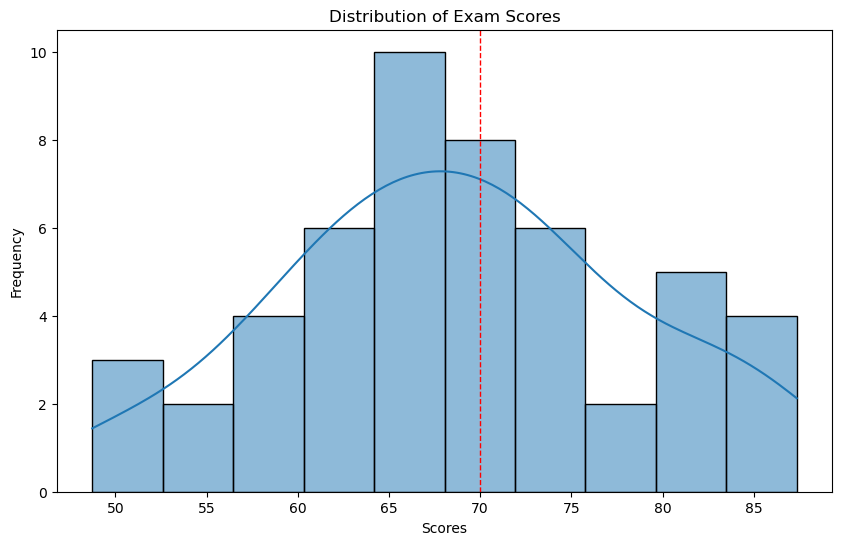

In [7]:
# Summarize data set with histogram
plt.figure(figsize=(10, 6))
sns.histplot(q1_df["exam_score"], kde=True, bins=10)
plt.axvline(national_avg, color="red", linestyle="dashed", linewidth=1, label="National Avg (70%)")
plt.title("Distribution of Exam Scores")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.show()

## Performing a T-Test

In [8]:
# t-test
national_avg = 70
t_stat, p_value = stats.ttest_1samp(q1_df["exam_score"], national_avg, alternative="less")

In [9]:
# Print results
print(f"Test Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("The hypothesis is rejected, student grades are significantly below the national average.")
else:
    print("The hypothesis not rejected, no significant difference seen between student grades and national average.")


Test Statistic: -0.9169771399834613
P-Value: 0.18182298516031403
The hypothesis not rejected, no significant difference seen between student grades and national average.


## Visualizations

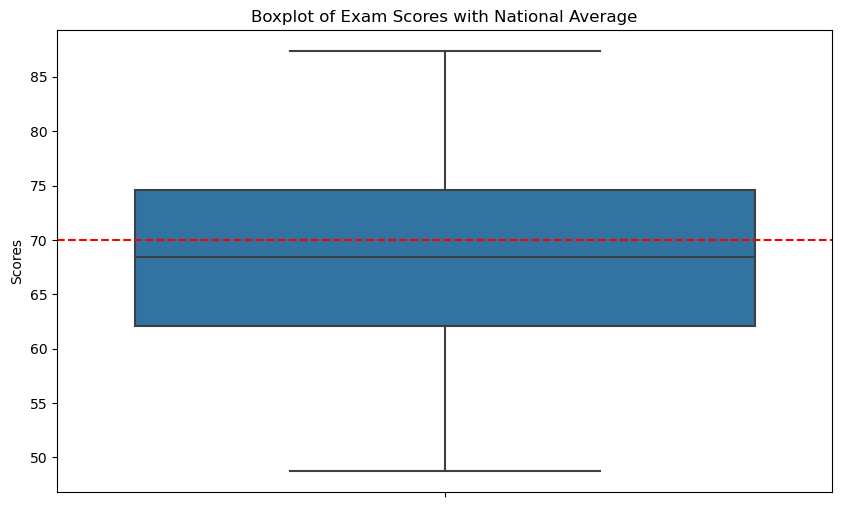

In [11]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=q1_df["exam_score"])
plt.axhline(y=national_avg, color="r", linestyle="--")
plt.title("Boxplot of Exam Scores with National Average")
plt.ylabel("Scores")
plt.show()

# Task 2: Diamonds Dataset Analysis

## Load the Dataset and Summary Statistics

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, t

In [13]:
# Loading the Diamonds dataset
diamond_df = pd.read_csv("diamonds.csv")

In [14]:
# Display first 5 lines
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
# Summary statistics
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Creating a New Binary Variable (colourless)

In [16]:
# Load the dataset and create the 'colourless' variable
diamond_df["colourless"] = diamond_df["color"].apply(lambda x: 1 if x in ["D", "E", "F"] else 0)


## Hypothesis Testing (Chi-Square Test)

In [18]:
# Chi-Square Test
contingency_table = pd.crosstab(diamond_df["clarity"], diamond_df["colourless"])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Chi-Square test results
chi2_results = f"Chi-Square Statistic: {chi2}\nP-Value: {p}\n"
if p < 0.01:
    chi2_results += "Reject the hypothesis: There is a significant relationship between clarity and whether a diamond is colorless.\n"
else:
    chi2_results += "The hypothesis is not rejected: There is no significant relationship between clarity and whether the diamond is colorless or not.\n"

print(chi2_results)

Chi-Square Statistic: 486.47305941485223
P-Value: 6.481587124454715e-101
Reject the hypothesis: There is a significant relationship between clarity and whether a diamond is colorless.



## Calculating Confidence Intervals

In [19]:
# Confidence intervals for average price
colourless_mean = diamond_df[diamond_df["colourless"] == 1]["price"].mean()
colourless_ci = t.interval(0.90, len(diamond_df[diamond_df["colourless"] == 1]["price"]) - 1, loc=colourless_mean, scale=stats.sem(diamond_df[diamond_df["colourless"] == 1]["price"]))

non_colourless_mean = diamond_df[diamond_df["colourless"] == 0]["price"].mean()
non_colourless_ci = t.interval(0.90, len(diamond_df[diamond_df["colourless"] == 0]["price"]) - 1, loc=non_colourless_mean, scale=stats.sem(diamond_df[diamond_df["colourless"] == 0]["price"]))

# Confidence intervals results
ci_results = f"Colourless Diamonds - Mean Price: {colourless_mean}, 90% CI: {colourless_ci}\n"
ci_results += f"Non-Colourless Diamonds - Mean Price: {non_colourless_mean}, 90% CI: {non_colourless_ci}\n"

print(ci_results)

Colourless Diamonds - Mean Price: 3337.759401087539, 90% CI: (3301.857515879007, 3373.661286296071)
Non-Colourless Diamonds - Mean Price: 4491.230072593977, 90% CI: (4448.778068284649, 4533.682076903305)



## Visualizations

AttributeError: 'numpy.int64' object has no attribute 'startswith'

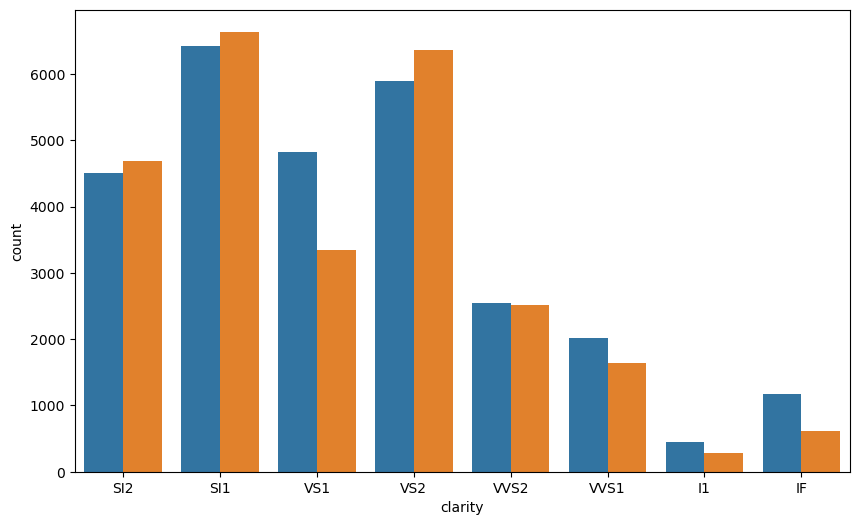

In [20]:
# Number of diamonds according to clarity and colorlessness
# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=diamond_df, x="clarity", hue="colourless")
plt.title("Count of Colourless and Non-Colourless Diamonds by Clarity")
plt.xlabel("Clarity")
plt.ylabel("Count")
plt.legend(title="Colourless")

plt.show()

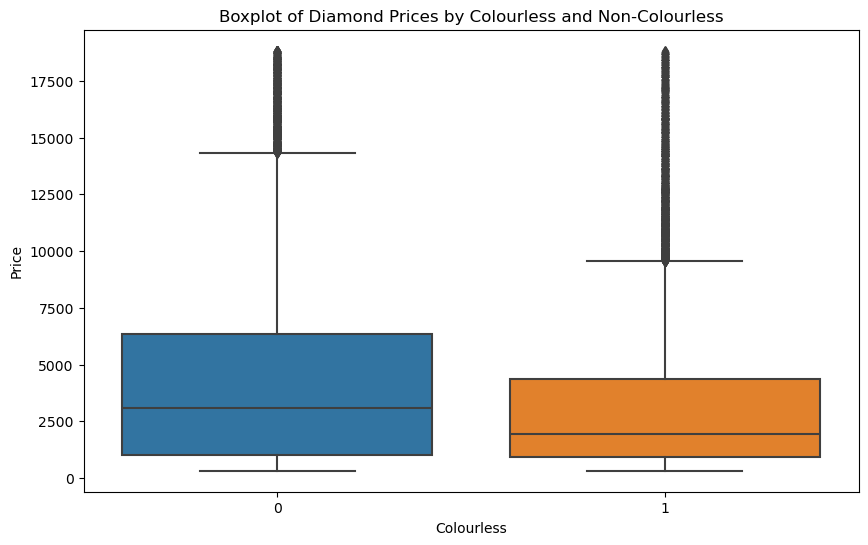

In [21]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="colourless", y="price", data=diamond_df)
plt.title("Boxplot of Diamond Prices by Colourless and Non-Colourless")
plt.xlabel("Colourless")
plt.ylabel("Price")
plt.show()

# Task 3: PlantGrowth Dataset Analysis

In [30]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Load the Dataset and Summary Statistics

In [22]:
# Load PlantGrowth dataset
plantgrowth_df = pd.read_csv("PlantGrowth.csv")

In [23]:
# Summary statistics by treatment groups
summary_stats = plantgrowth_df.groupby("group")["weight"].describe()
print(summary_stats)

       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31


## Boxplot

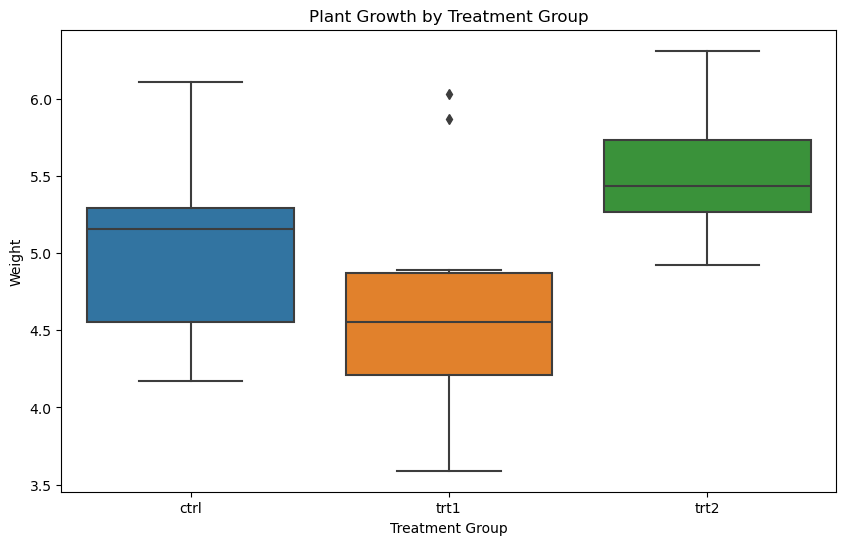

In [24]:
# Box plot summarizing the data set
plt.figure(figsize=(10, 6))
sns.boxplot(x="group", y="weight", data=plantgrowth_df)
plt.title("Plant Growth by Treatment Group")
plt.xlabel("Treatment Group")
plt.ylabel("Weight")
plt.show()

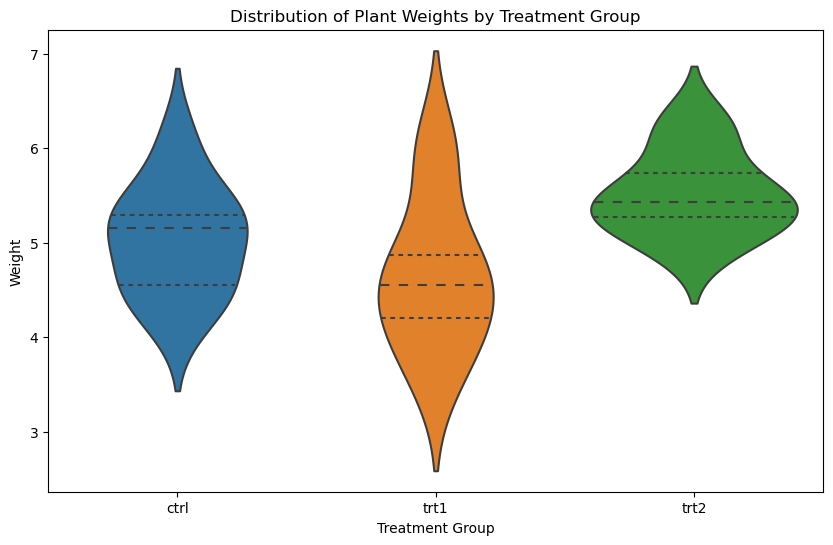

In [25]:
# Violin chart to better understand the means and distributions of groups
plt.figure(figsize=(10, 6))
sns.violinplot(x="group", y="weight", data=plantgrowth_df, inner="quartile")
plt.title("Distribution of Plant Weights by Treatment Group")
plt.xlabel("Treatment Group")
plt.ylabel("Weight")
plt.show()

C:\Users\tayla\AppData\Local\Temp\ipykernel_11708\2315965096.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="group", y="weight", data=plantgrowth_df, ci="sd")


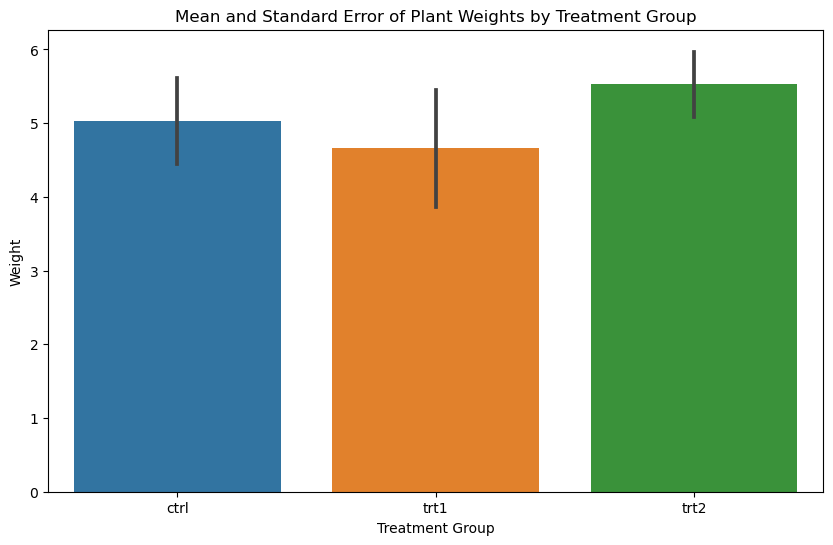

In [26]:
# Mean and standard error bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="group", y="weight", data=plantgrowth_df, ci="sd")
plt.title("Mean and Standard Error of Plant Weights by Treatment Group")
plt.xlabel("Treatment Group")
plt.ylabel("Weight")
plt.show()

## ANOVA Test

In [29]:
# Perform ANOVA test
anova_result = stats.f_oneway(
    plantgrowth_df[plantgrowth_df["group"] == "ctrl"]["weight"],
    plantgrowth_df[plantgrowth_df["group"] == "trt1"]["weight"],
    plantgrowth_df[plantgrowth_df["group"] == "trt2"]["weight"]
)
print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

ANOVA F-statistic: 4.846087862380136
ANOVA p-value: 0.0159099583256229


## Tukey HSD Test

In [31]:
# If ANOVA is significant, perform Tukey HSD test
if anova_result.pvalue < 0.05:
    tukey_result = pairwise_tukeyhsd(plantgrowth_df["weight"], plantgrowth_df["group"], alpha=0.05)
    print(tukey_result)
else:
    print("No significant differences between group means.")

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


## Visualizations

C:\Users\tayla\AppData\Local\Temp\ipykernel_11708\3042731644.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x="group", y="weight", data=plantgrowth_df, ci=95, join=False)


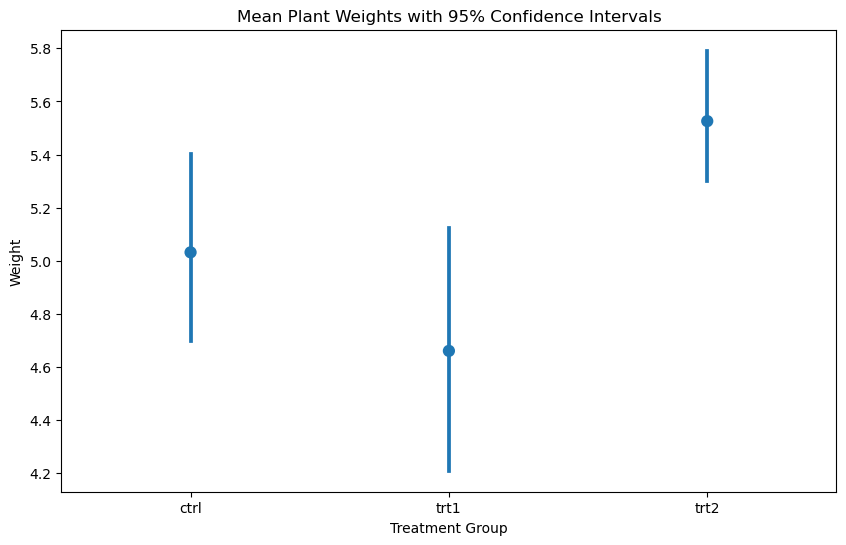

In [32]:
# Graph showing mean weights and confidence intervals
plt.figure(figsize=(10, 6))
sns.pointplot(x="group", y="weight", data=plantgrowth_df, ci=95, join=False)
plt.title("Mean Plant Weights with 95% Confidence Intervals")
plt.xlabel("Treatment Group")
plt.ylabel("Weight")
plt.show()

C:\Users\tayla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tayla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


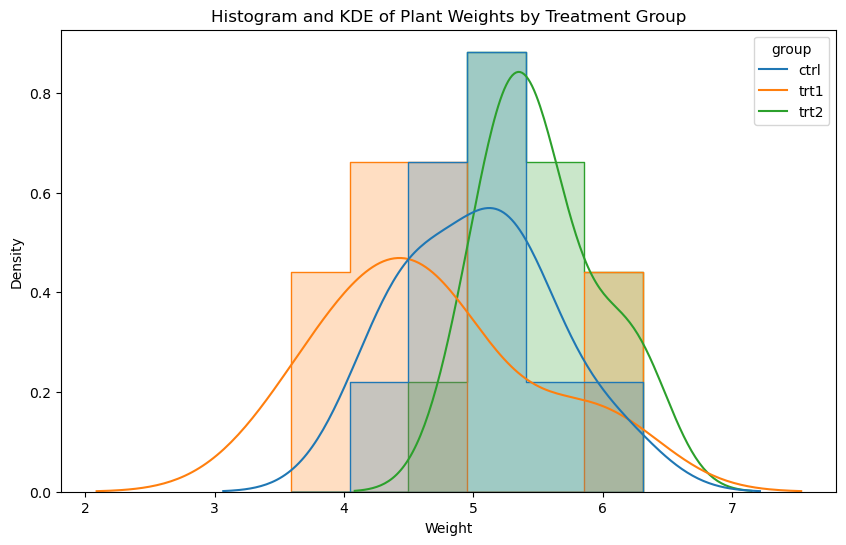

In [33]:
# Histogram and KDE chart
plt.figure(figsize=(10, 6))
sns.histplot(plantgrowth_df, x="weight", hue="group", element="step", stat="density", common_norm=False)
sns.kdeplot(data=plantgrowth_df, x="weight", hue="group", common_norm=False)
plt.title("Histogram and KDE of Plant Weights by Treatment Group")
plt.xlabel("Weight")
plt.ylabel("Density")
plt.show()

# Task 4: Trees Dataset Analysis

In [34]:
import statsmodels.api as sm
from scipy.stats import pearsonr

## Load the Dataset and Summary Statistics

In [35]:
# Load the trees dataset
trees_df = pd.read_csv("trees.csv")

In [36]:
# Display the first few rows of the dataset
print(trees_df.head())

   Unnamed: 0  Girth  Height  Volume
0           1    8.3      70    10.3
1           2    8.6      65    10.3
2           3    8.8      63    10.2
3           4   10.5      72    16.4
4           5   10.7      81    18.8


In [37]:
# Summary statistics
summary_stats = trees_df.describe()
print(summary_stats)

       Unnamed: 0      Girth     Height     Volume
count   31.000000  31.000000  31.000000  31.000000
mean    16.000000  13.248387  76.000000  30.170968
std      9.092121   3.138139   6.371813  16.437846
min      1.000000   8.300000  63.000000  10.200000
25%      8.500000  11.050000  72.000000  19.400000
50%     16.000000  12.900000  76.000000  24.200000
75%     23.500000  15.250000  80.000000  37.300000
max     31.000000  20.600000  87.000000  77.000000


## Correlation Matrix

In [38]:
# Correlation Matrix
correlation_matrix = trees_df.corr()
print(correlation_matrix)

            Unnamed: 0     Girth    Height    Volume
Unnamed: 0    1.000000  0.967207  0.467204  0.903349
Girth         0.967207  1.000000  0.519280  0.967119
Height        0.467204  0.519280  1.000000  0.598250
Volume        0.903349  0.967119  0.598250  1.000000


## Correlation Analysis and Hypothesis Tests

In [39]:
# Pearson correlation coefficients and p-values
girth_height_corr, girth_height_pval = pearsonr(trees_df["Girth"], trees_df["Height"])
girth_volume_corr, girth_volume_pval = pearsonr(trees_df["Girth"], trees_df["Volume"])
height_volume_corr, height_volume_pval = pearsonr(trees_df["Height"], trees_df["Volume"])

print(f"Girth-Height Correlation: {girth_height_corr}, P-value: {girth_height_pval}")
print(f"Girth-Volume Correlation: {girth_volume_corr}, P-value: {girth_volume_pval}")
print(f"Height-Volume Correlation: {height_volume_corr}, P-value: {height_volume_pval}")

Girth-Height Correlation: 0.5192800719499373, P-value: 0.0027578147930576663
Girth-Volume Correlation: 0.9671193682556305, P-value: 8.6443342117705775e-19
Height-Volume Correlation: 0.5982496519917823, P-value: 0.00037838234791848544


## Regresyon Analysis

In [40]:
# Simple linear regression: Girth vs. Volume
X_girth = trees_df["Girth"]
Y = trees_df["Volume"]
X_girth = sm.add_constant(X_girth)
model_girth = sm.OLS(Y, X_girth).fit()
print(model_girth.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     419.4
Date:                Sun, 19 May 2024   Prob (F-statistic):           8.64e-19
Time:                        22:23:40   Log-Likelihood:                -87.822
No. Observations:                  31   AIC:                             179.6
Df Residuals:                      29   BIC:                             182.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9435      3.365    -10.978      0.0

In [41]:
# Simple linear regression: Height vs. Volume
X_height = trees_df["Height"]
X_height = sm.add_constant(X_height)
model_height = sm.OLS(Y, X_height).fit()
print(model_height.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     16.16
Date:                Sun, 19 May 2024   Prob (F-statistic):           0.000378
Time:                        22:24:58   Log-Likelihood:                -123.40
No. Observations:                  31   AIC:                             250.8
Df Residuals:                      29   BIC:                             253.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -87.1236     29.273     -2.976      0.0

In [42]:
# Multiple linear regression: Volume vs Girth and Height
X_both = trees_df[["Girth", "Height"]]
X_both = sm.add_constant(X_both)
model_both = sm.OLS(Y, X_both).fit()
print(model_both.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     255.0
Date:                Sun, 19 May 2024   Prob (F-statistic):           1.07e-18
Time:                        22:25:01   Log-Likelihood:                -84.455
No. Observations:                  31   AIC:                             174.9
Df Residuals:                      28   BIC:                             179.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -57.9877      8.638     -6.713      0.0

## Visualizations

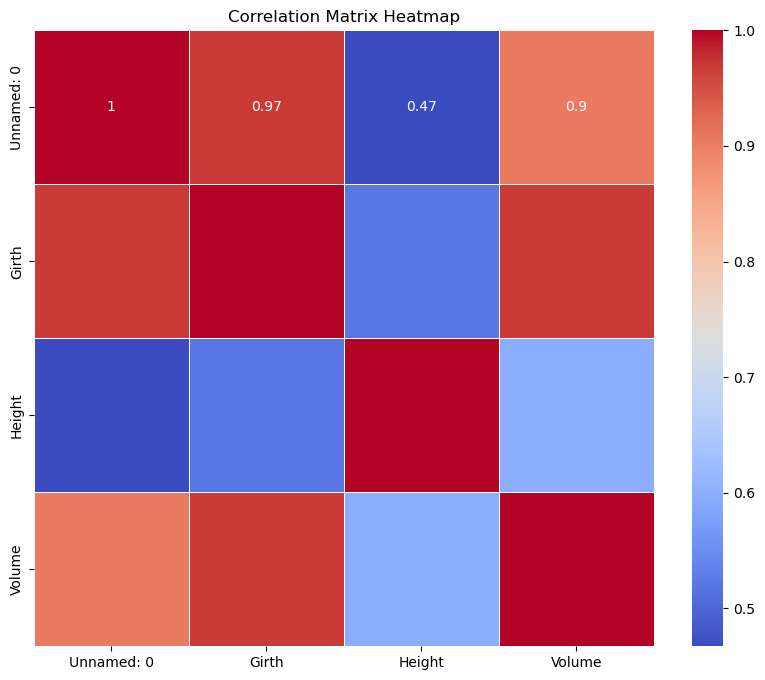

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

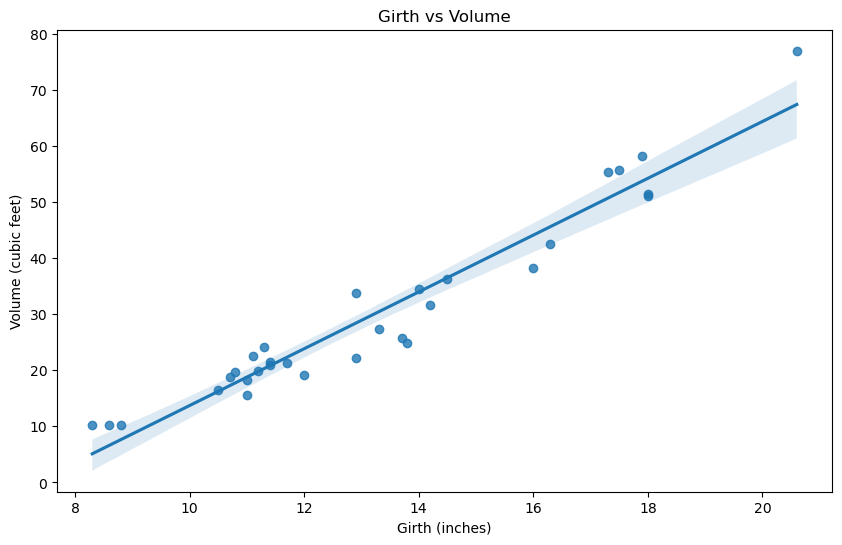

In [44]:
plt.figure(figsize=(10, 6))
sns.regplot(x="Girth", y="Volume", data=trees_df)
plt.title("Girth vs Volume")
plt.xlabel("Girth (inches)")
plt.ylabel("Volume (cubic feet)")
plt.show()

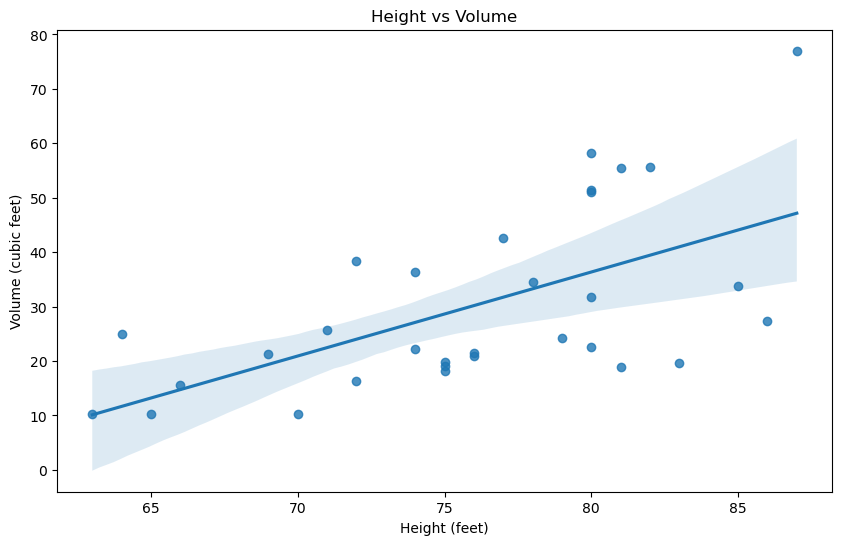

In [45]:
plt.figure(figsize=(10, 6))
sns.regplot(x="Height", y="Volume", data=trees_df)
plt.title("Height vs Volume")
plt.xlabel("Height (feet)")
plt.ylabel("Volume (cubic feet)")
plt.show()
